# Data Undetstanding

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('/Users/xiaoming/Library/CloudStorage/OneDrive-AsiaPacificUniversity/Degree Y3S2/FYP/retail_store_inventory.csv')

##### NORMAL  INFORMATION (ROW+COLUMN AMOUNTS AND ATTRIBUTES DATA TYPES)

In [5]:
print("ROW, COLUMNS: \n", df.shape)
print("\nATTRIBUTES DATA TYPES: \n", df.dtypes)


ROW, COLUMNS: 
 (73100, 15)

ATTRIBUTES DATA TYPES: 
 Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object


##### NORMAL DATA INFORMATION (NULL AND DUPLICATES)

In [6]:
print("\nMISSING DATA: \n",df.isnull().sum())
print("\nDUPLICATES DATA: ",df.duplicated().sum())



MISSING DATA: 
 Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

DUPLICATES DATA:  0


##### TOTAL UNIQUE VALUE FOR CATEGORY COLUMNS

In [7]:
print("UNIQUE VALUE:")
for col in ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']:
    print(f"{col}: {df[col].nunique()} unique values")

UNIQUE VALUE:
Store ID: 5 unique values
Product ID: 20 unique values
Category: 5 unique values
Region: 4 unique values
Weather Condition: 4 unique values
Seasonality: 4 unique values


##### RANGE OF NUMERIC ATTRIBUTES

In [8]:
num_cols = ['Inventory Level', 'Units Sold', 'Units Ordered',
            'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing',]
print("\nNumerical Columns Stats:")
print(df[num_cols].describe())


Numerical Columns Stats:
       Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Competitor Pricing  
count  73100.000000  73100.000000        73100.000000  
mean      55.135108     10.009508           55.146077  
std       26.021945      7.083746           26.191408  
min       10.000000      0.000000            5.030000  
25%       32.650000      5.000000           3

In [9]:
print(df.head())

         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1           

In [10]:
df["Date"] = pd.to_datetime(df["Date"])
print(df.dtypes)

Date                  datetime64[ns]
Store ID                      object
Product ID                    object
Category                      object
Region                        object
Inventory Level                int64
Units Sold                     int64
Units Ordered                  int64
Demand Forecast              float64
Price                        float64
Discount                       int64
Weather Condition             object
Holiday/Promotion              int64
Competitor Pricing           float64
Seasonality                   object
dtype: object


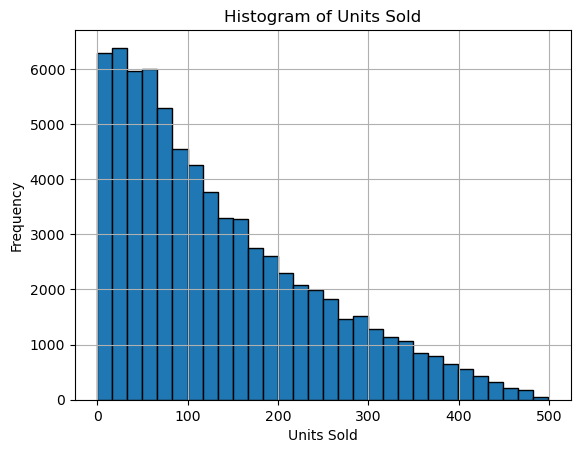

Skewness: 0.9053326253493985


In [11]:
import matplotlib.pyplot as plt

# Plot histogram for 'Units Sold'
df['Units Sold'].hist(bins=30, edgecolor='black')
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


# For a particular column
skewness = df['Units Sold'].skew()
print(f"Skewness: {skewness}")

#

#

#

# Model Building

RMSE: 87.88590403987575
MAE: 68.89403533935547
R2 Score: 0.3412550687789917


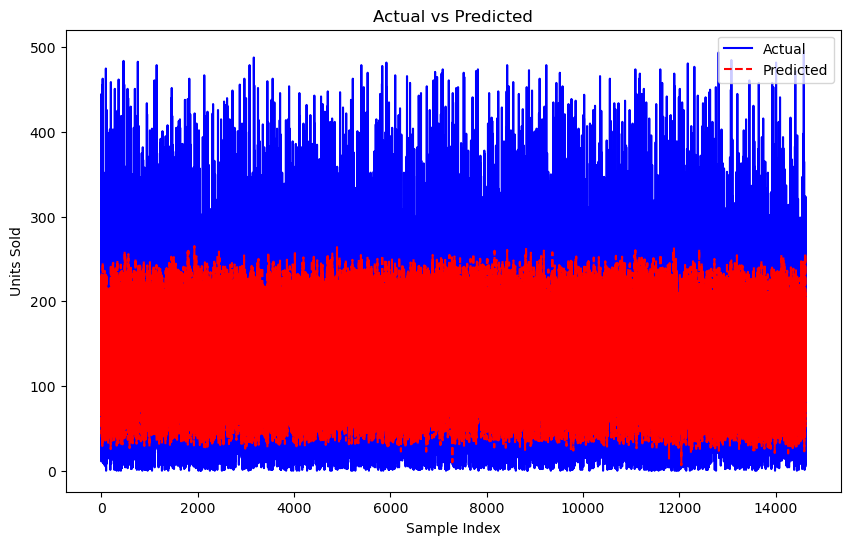

In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('retail_store_inventory.csv')

# Preprocessing: Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Define features (X) and target (y)
X = df.drop(['Units Sold', 'Demand Forecast', 'Date'], axis=1)
y = df['Units Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the numerical and categorical features
categorical_features = [
    'Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Holiday/Promotion', 'Seasonality'
]

numerical_features = [
    'Inventory Level', 'Units Ordered', 'Price', 'Discount', 'Competitor Pricing', 
    'Day', 'Month', 'Year', 'DayOfWeek'
]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Apply transformations to the train and test datasets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                         max_depth=5, alpha=10, n_estimators=100)

model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_preprocessed)

# Evaluate the model using RMSE, MAE, and R2 Score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

# Plot Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", linestyle='dashed', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Units Sold')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

##### Libraries needed for model building

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.20014286128198325, max_depth=13, min_child_weight=8, n_estimators=70, subsample=0.5780093202212182; total time=   3.9s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.20014286128198325, max_depth=13, min_child_weight=8, n_estimators=70, subsample=0.5780093202212182; total time=   4.1s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.20014286128198325, max_depth=13, min_child_weight=8, n_estimators=70, subsample=0.5780093202212182; total time=   4.1s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.20014286128198325, max_depth=13, min_child_weight=8, n_estimators=70, subsample=0.5780093202212182; total time=   3.9s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.20014286128198325, max_depth=13, min_child_weight=8, n_estimators=70, subsample=0.5780093202212182; total time=   4.0s
[CV] END colsample_bytree=0.5779

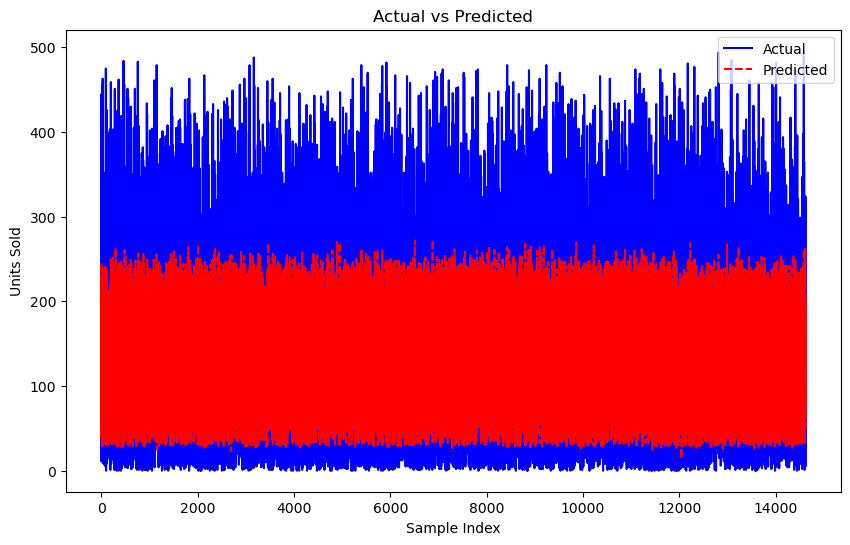

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Load the dataset
df = pd.read_csv('retail_store_inventory.csv')

# Add time features
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Create lag features
df['Lag_1'] = df['Units Sold'].shift(1)
df['Lag_2'] = df['Units Sold'].shift(2)
df['Lag_3'] = df['Units Sold'].shift(3)

# Drop missing values (due to lag)
df.dropna(inplace=True)

# Define the features (X) and target (y)
X = df.drop(['Units Sold', 'Demand Forecast', 'Date'], axis=1)
y = df['Units Sold']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the categorical and numerical features
categorical_features = [
    'Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Holiday/Promotion', 'Seasonality'
]

numerical_features = [
    'Inventory Level', 'Units Ordered', 'Price', 'Discount', 'Competitor Pricing', 
    'Day', 'Month', 'Year', 'DayOfWeek', 'Lag_1', 'Lag_2', 'Lag_3'
]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Apply transformations to the train and test datasets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameters to tune
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 10),
    'colsample_bytree': uniform(0.5, 0.5),
    'subsample': uniform(0.5, 0.5),
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='neg_mean_squared_error',  # Using negative MSE for regression
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model using the training data
random_search.fit(X_train_preprocessed, y_train)

# Get the best model from the search
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test_preprocessed)

# Evaluate the model using RMSE, MAE, and R2 Score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

# Plot Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", linestyle='dashed', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Units Sold')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()